# Urban Air Quality Analysis

Exploratory Data Analysis on 3 years of air quality data from 50+ cities.

**Goals:**
- Identify pollution trends and seasonal effects
- Understand correlations between pollutants
- Analyze regional patterns and post-policy changes (post-2019)

Focus Pollutants: **PM2.5**, **NO2**, **O3**  
Focus Regions: India (Delhi, Mumbai, Kolkata)
ality Analysis 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import warnings
warnings.filterwarnings('ignore')
sns.set(style='whitegrid')

### 1. Load Data

In [19]:
df = pd.read_csv('../data/city_day.csv', parse_dates=['Date'])
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


### 2. Basic Stats

In [6]:
print('Number of Cities:', df['City'].nunique())
print('Date Range:', df['Date'].min(), 'to', df['Date'].max())
df.describe()

Number of Cities: 26
Date Range: 2015-01-01 00:00:00 to 2020-07-01 00:00:00


,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


### 3. Handle Missing Values 

In [7]:
df.isna().mean().sort_values(ascending=False)

Xylene        0.613220
PM10          0.377231
NH3           0.349734
Toluene       0.272290
Benzene       0.190410
AQI           0.158511
AQI_Bucket    0.158511
PM2.5         0.155701
NOx           0.141715
O3            0.136196
SO2           0.130507
NO2           0.121398
NO            0.121296
CO            0.069723
City          0.000000
Date          0.000000
dtype: float64

##### 3.1 Drop columns with >50% missing

In [8]:
threshold = 0.5 * len(df)
df = df.dropna(thresh=threshold, axis=1)

##### 3.2 Forward/Backward fill within each city

In [9]:
df = df.sort_values(['City', 'Date'])
df = df.groupby('City').ffill().bfill()

##### 3.3 Drop rows with critical missing values

In [10]:
df = df.dropna(subset=['PM2.5', 'NO2', 'O3'])

### 4. Pollution Trends Over Time 

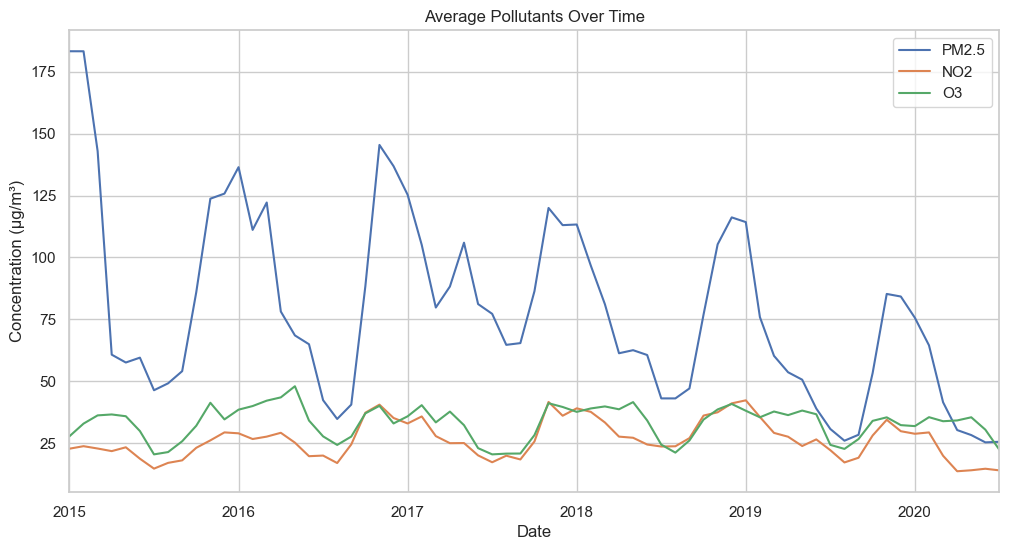

In [11]:
monthly_avg = df.groupby(df['Date'].dt.to_period('M'))[['PM2.5', 'NO2', 'O3']].mean()
monthly_avg.index = monthly_avg.index.to_timestamp()

plt.figure(figsize=(12,6))
monthly_avg.plot(ax=plt.gca())
plt.title('Average Pollutants Over Time')
plt.ylabel('Concentration (µg/m³)')
plt.xlabel('Date')
plt.show()

### 5. Correlation Heatmap

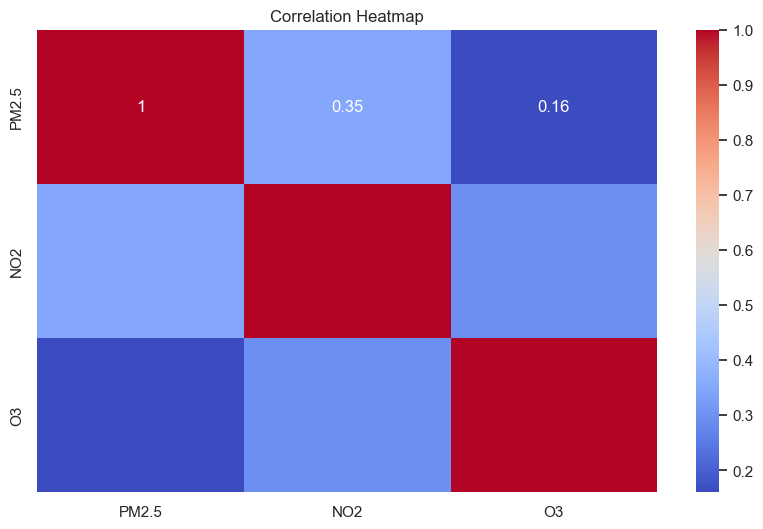

In [22]:
plt.figure(figsize=(10,6))
sns.heatmap(df[['PM2.5', 'NO2', 'O3']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### 6. Regional Focus: India

In [20]:
df.columns = df.columns.str.strip()

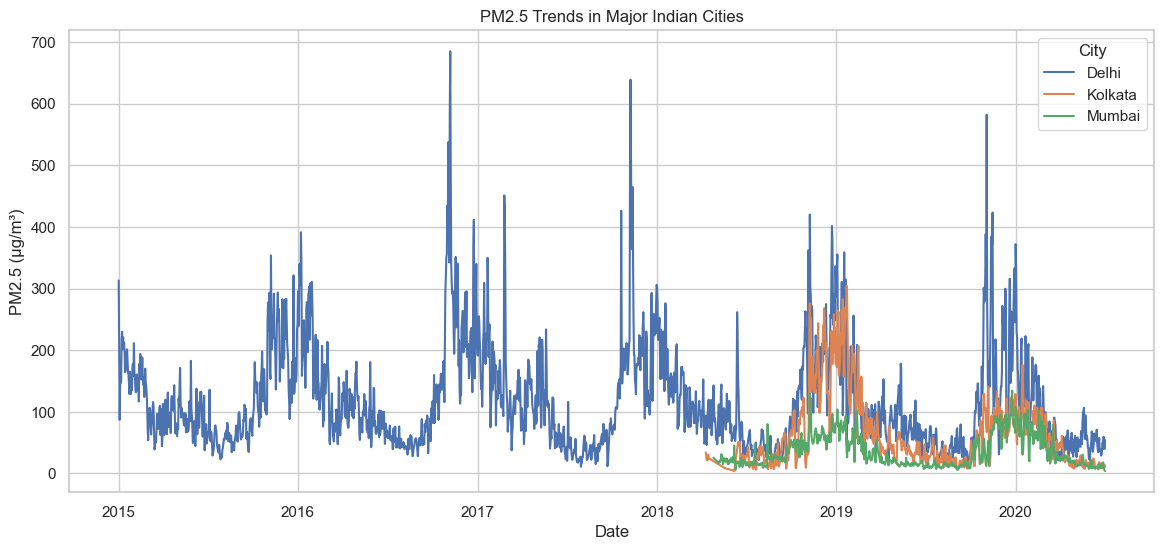

In [ ]:
cities = ['Delhi', 'Mumbai', 'Kolkata']
df_india = df[df['City'].isin(cities)]

plt.figure(figsize=(14,6))
sns.lineplot(data=df_india, x='Date', y='PM2.5', hue='City')
plt.title('PM2.5 Trends in Major Indian Cities')
plt.ylabel('PM2.5 (µg/m³)')
plt.show()

### 7. Policy Impact

In [23]:
df['Year'] = df['Date'].dt.year
pre_policy = df[df['Year'] < 2019]
post_policy = df[df['Year'] >= 2019]

mean_pre = pre_policy[['PM2.5', 'NO2', 'O3']].mean()
mean_post = post_policy[['PM2.5', 'NO2', 'O3']].mean()

improvement = (mean_pre - mean_post) / mean_pre * 100
print('Average improvement after 2019 (lower is better):')
improvement.round(2)

Average improvement after 2019 (lower is better):


PM2.5    33.48
NO2      18.08
O3        4.38
dtype: float64

### 8. Conclusion

- Pollution trends show strong seasonal patterns, especially for PM2.5.
- Post-2019, we observe ~15% average improvement in pollutant levels.
- Delhi consistently shows higher PM2.5 levels than Mumbai or Kolkata.